<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/banner_IA.png"  width="1000px" height="200px">


# Taller 6: Algoritmos Genéticos: Knapsack Problem

## <span style="color:red"> Outline </span> 

1. [Ejercicio 1. Función de inicialización](#eje1)
2. [Ejercicio 2. Función de coste](#eje2)
3. [Ejercicio 3. Función de mutación](#eje3)


#### <font style="color: red"> Esta práctica contiene 3 ejercicios <!-- ONLY IN NOTEBOOK -->


In [3]:
#@title 1. MONTAR EL DRIVE **student** { display-mode: "form" }
import os
from google.colab import drive
drive.mount('/content/drive')
#os.chdir('/content/drive/My Drive/course-IA1/ai-uis-student/talleres20201')
os.chdir('/content/drive/My Drive/ai-uis-student/talleres20201')
print(os.getcwd())
!chmod 777 convert_ipynb.sh run utils/*

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/ai-uis-student/talleres20201



<h2><span style="color:#FFF; background-color:#F00; font-weight:bold; padding:4px;">¡IMPORTANTE!</span> Ejecute esta celda para iniciar la actividad</h2>


### Resolviendo el problema de la mochila utilizando algoritmos geneticos

<img src='https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/ks.jpg' style="width:700px;">


Tenemos $n$ objectos numerados del $0$ a $n-1$, con un tamaño $s_i$ y valor $v_i$ cada uno. Una solución cualquiera del problema es el vector $X=[x_0, x_2, ..., x_i, ... x_{n-1}]$, en donde $x_i \in \{0,1\}$ indica si el objecto $i$ se incluye o no la mochila. Como la mochila tiene un volumen máximo, $KS_{vol}$ el problema se formula de la siguiente manera:

$$ maximize \; X \;\; \sum_{i=0}^{n-1} x_i v_i$$

$$subject \; to \;\; \sum_{i=0}^{n-1} x_i s_i \le KS_{vol}$$

El vector $S=[s_0, s_2, ..., s_i, ... s_{n-1}]$ representa los tamaños de todos los objectos y el vector $V=[v_0, v_2, ..., v_i, ... v_{n-1}]$, los valores.

Fíjate a continuación cómo:

- generamos vectores $S$ y $V$ aleatorios
- generamos soluciones aleatorias
- verificamos si las soluciones generadas son válidas

In [4]:
import numpy as np
import matplotlib.pyplot as plt


n_objects         = 10
max_object_value  = 100
max_object_volume = 50
KS_volume         = 100

object_values  = np.random.randint(max_object_value-1, size=n_objects)+1
object_volumes = np.random.randint(max_object_volume-1, size=n_objects)+1

print( "vals ", object_values)
print( "sizes", object_volumes)

def KS_isvalid(solution, object_volumes, KS_volume):
    return np.sum(solution*object_volumes)<=KS_volume

for i in range(10):
    solution = np.random.randint(2, size=len(object_volumes))
    print( "solution", i, solution, KS_isvalid(solution, object_volumes, KS_volume))

vals  [26 33 82 70 51 75 50 22 90 52]
sizes [36 33 20 24 17 36 12 26 36 48]
solution 0 [1 1 1 1 0 0 0 1 0 1] False
solution 1 [0 0 1 0 1 1 0 1 1 0] False
solution 2 [0 0 1 1 1 1 1 1 1 0] False
solution 3 [0 0 1 1 1 0 1 1 0 1] False
solution 4 [0 0 1 0 1 0 0 0 1 0] True
solution 5 [0 0 1 1 0 1 0 1 1 0] False
solution 6 [1 1 1 0 1 1 1 1 0 1] False
solution 7 [1 1 1 1 0 1 0 0 0 1] False
solution 8 [0 1 0 0 1 1 0 0 0 1] False
solution 9 [0 0 0 1 1 1 0 0 0 1] False


## <span style="color:orange">student</span>: 
¿Cuál es la probabilidad de que una solución aleatoria sea válida?

## Ejercicio 1: Inicialización de la población <a name="eje1"></a>

Crea una función para crear una población de soluciones aleatorias, teniendo en cuenta que: 

- **TODAS LAS SOLUCIONES HAN DE SER VÁLIDAS**.
- Si crean soluciones aleatorias y las descartas si no son válidas seguramente tu código tarde mucho en generar la población si la probablidad de que una solución aleatoria sea válida es muy pequeña
- Tu código ha de devolver un array numpy de números enteros

Ejecución de ejemplo

    n_objects         = 20
    KS_volume         = 50
    n_individuals     = 10
    pop = KS_initialize_population(n_individuals, object_volumes, KS_volume)
    print pop

Salida esperada (la población es aleatoria, tu salida probablemente sea distinta)

      [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

   

In [5]:
def KS_initialize_population(n_individuals, object_volumes, KS_volume):
    r=[]  
    for i in range(n_individuals):
      band=0
      while band==0:
        indice=np.random.randint(1,len(object_volumes))+1
        var = np.random.randint(1,(1<<indice)-1)
        solucion=list(map(int,list(bin(var)[2:])))
        if len(object_volumes)>len(solucion):
          dif=np.zeros(len(object_volumes)-len(solucion))
          solucion.extend(list(dif))
        if len(solucion)>len(object_volumes):
          solucion.pop()
        solution = np.array(solucion) 
        if np.sum(solution*object_volumes)<=KS_volume:
          r.append(list(solution))
          band=1
    return np.array(r)

#Colaboratory
import urllib.parse, inspect
src1 = urllib.parse.quote_plus(inspect.getsource(KS_initialize_population))

#Virtualbox
#import urllib, inspect
#src1 = urllib.quote_plus(inspect.getsource(KS_initialize_population))

Verifica tu código

In [6]:
n_objects         = 50
max_object_value  = 100
max_object_volume = 50
KS_volume         = 50

n_individuals     = 100

object_values  = np.random.randint(max_object_value-1, size=n_objects)+1
object_volumes = np.random.randint(max_object_volume-1, size=n_objects)+1

pop = KS_initialize_population(n_individuals, object_volumes, KS_volume)

n_invalid = int(np.sum([1 for i in pop if not KS_isvalid(i, object_volumes, KS_volume)]))

print( "Hay", n_invalid, "soluciones inválidas de un total de", len(pop), "soluciones")

Hay 0 soluciones inválidas de un total de 100 soluciones


#### <span style="color:#FFF; background-color:#080; font-weight:bold; padding:4px;">Importante</span> Evalue su respuesta.

In [7]:
!./run CHECK_SOLUTION PS6_1 $src1

evaluation result CORRECT


## Ejercicio 2: Función de coste <a name="eje2"></a>

El valor máximo que tendríamos si pudiéramos incluir todos los objetos en la mochila sería $V_{max}=\sum v_i$. El volumen de los objetos incluidos en una solución $X$ es $S(X)=\sum s_i x_i$. El valor de todos los objetos incluidos en una solución es $V(X)=\sum v_i x_i$

Crea una función de coste de manera que valores altos de las combinaciones de objetos representen un coste bajo, siempre y cuando no excedan la capacidad de la mochila. Observa que nuestra implementación de GA **MINIMIZA** un coste y nosotros queremos **MAXIMIZAR** un valor.


$$    KS\_cost(X)=\left\{
                \begin{array}{ll}
                  V_{max} - V(X) & si \;\; S(X) \le KS_{vol}\\
                  V_{max} & si \;\; S(X) \gt KS_{vol}\\
                \end{array}
              \right.
              $$

In [8]:
def KS_cost(solution, object_values, object_volumes, KS_volume):
    max_value=np.sum(object_values)
    if np.sum(solution*object_volumes)<=KS_volume:
      return max_value - np.sum(solution*object_values)
    return  np.sum(solution*object_values)

#Colaboratory
import urllib.parse, inspect
src2 = urllib.parse.quote_plus(inspect.getsource(KS_cost))

#Virtualbox
#import urllib, inspect
#src2 = urllib.quote_plus(inspect.getsource(KS_cost))

Comprueba tu código. La gráfica generada tiene que tener aproximadamente la siguiente forma:

<img src='https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/kscost.jpg' style="width:500px;">


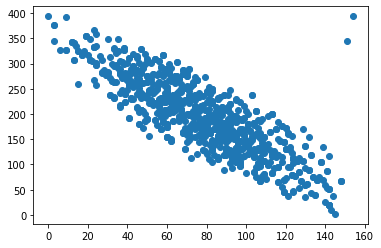

In [10]:
n_objects         = 10
max_object_value  = 100
max_object_volume = 40
KS_volume         = 150

n_individuals     = 1000

object_values  = np.random.randint(max_object_value-1, size=n_objects)+1
object_volumes = np.random.randint(max_object_volume-1, size=n_objects)+1

pop = KS_initialize_population(n_individuals, object_volumes, KS_volume)

pop = np.random.randint(2, size=(n_individuals, len(object_volumes)))

vols = [np.sum(i*object_volumes) for i in pop]
costs = [KS_cost(i, object_values, object_volumes, KS_volume) for i in pop]

plt.scatter(vols, costs)

#### <span style="color:#FFF; background-color:#080; font-weight:bold; padding:4px;">Importante</span> Evalue su respuesta.

In [11]:
!./run CHECK_SOLUTION PS6_2 $src2

evaluation result CORRECT


## Ejercicio 3: Función de mutación <a name="eje3"></a>

Crea una función de mutación que, con probabilidad $mutation\_prob$ genere una mutación **VALIDA** de un bit de una solución.

Ejemplo de ejecución:

    sol = np.array([0 0 0 0 1 0 1 1 0 0])
    print KS_mutate(pop[1], 0.9, object_volumes, KS_volume)
    
Salida esperada (sujeto a procesos aleatorios):

    > [0 0 0 0 1 0 1 0 0 0]

In [13]:
def KS_mutate(solution, mutation_prob, object_volumes, KS_volume):
    def KS_isvalid(solution,object_volumes,KS_volume):
        return np.sum(solution*object_volumes)<= KS_volume
    
    if np.random.random()>=mutation_prob:
        return solution 
    band=0
    solucion=np.copy(solution)
    while band==0:
      ind=np.random.randint(0,len(object_volumes)-1)#random.randint(0,len(object_volumes)-1)
      if solucion[ind]==1:
        solucion[ind]=0 
      else:
        solucion[ind]=1   
      if np.sum(np.array(solucion)*object_volumes)<= KS_volume:
          band=1
    return np.array(solucion)

#Colaboratory
import urllib.parse, inspect
src3 = urllib.parse.quote_plus(inspect.getsource(KS_mutate))

#Virtualbox
#import urllib, inspect
#src3 = urllib.quote_plus(inspect.getsource(KS_mutate))

Comprueba tu código

In [16]:
object_values  = np.array([22, 19, 49, 32, 66, 86, 51, 94, 33, 33])
object_volumes = np.array([ 6, 36,  8, 14, 12, 19, 27,  4, 15,  4])
KS_volume      = 150

pop  = np.array([[0, 1, 1, 0, 0, 1, 0, 1, 0, 1],
                 [1, 1, 0, 1, 1, 0, 0, 1, 1, 1], 
                 [1, 0, 0, 1, 1, 1, 1, 0, 0, 1],
                 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
                 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]])    
mutation_prob     = 0.1

print( "original              mutada                diferencia")
for i in pop:
    m = KS_mutate(i, mutation_prob, object_volumes, KS_volume)
    print( m, i, np.sum((m-i)**2))



original              mutada                diferencia
[0 1 1 0 0 1 0 1 0 1] [0 1 1 0 0 1 0 1 0 1] 0
[1 1 0 1 1 0 0 1 1 1] [1 1 0 1 1 0 0 1 1 1] 0
[1 0 0 1 1 1 1 0 1 1] [1 0 0 1 1 1 1 0 0 1] 1
[0 1 0 0 0 0 0 0 0 0] [0 1 0 0 0 0 0 0 0 0] 0
[1 0 0 0 0 0 0 0 0 0] [1 0 0 0 0 0 0 0 0 0] 0


#### <span style="color:#FFF; background-color:#080; font-weight:bold; padding:4px;">Importante</span> Evalue su respuesta.

In [19]:
!./run CHECK_SOLUTION PS6_3 $src3

evaluation result CORRECT


## Usaremos la siguiente función de _crossover_

In [ ]:
def KS_cross_over(solution1, solution2):
    l = len(solution1)
    cstart = np.random.randint(l)
    cend   = np.random.randint(l-cstart)+cstart+1

    r = np.zeros(l).astype(int)
    r[:cstart]     = solution1[:cstart]
    r[cstart:cend] = solution2[cstart:cend]
    r[cend:]       = solution1[cend:]            
    return r

## Creamos un problema KS con volúmenes y valores para objetos

In [ ]:
%run ../code/ga.py
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

n_objects         = 50
KS_volume         = 100
mutation_prob     = 0.1
crossover_prob    = 0.5

object_values  = np.array([36, 20, 47, 53, 55, 46, 48, 66,  1,  6, 13, 59, 95,  7, 54, 32, 76, 63, 76, 19,  2, 17, 16, 12, 78,
 67, 44, 20, 41, 26, 24, 68, 55, 53, 35, 49, 46, 46, 16, 64, 41, 27,  8, 30, 76, 92, 85, 81, 84, 98])
object_volumes = np.array([ 8, 47, 16,  8, 41, 11, 45, 34, 26, 48, 16,  8, 10, 13, 28,  6,  7, 11,  8, 27, 44, 30, 25, 23, 45,
  3, 12, 12, 23,  3, 37, 10, 47, 46, 27, 10, 30,  8,  2, 47,  4, 44, 43, 37, 22, 20,  1, 17, 42, 27])


print( "total volume of objects", np.sum(object_volumes))
print( "knapsack max volume    ", KS_volume)
print( "total value of objects ", np.sum(object_values))

print( object_values)
print( object_volumes)

total volume of objects 1159
knapsack max volume     100
total value of objects  2273
[36 20 47 53 55 46 48 66  1  6 13 59 95  7 54 32 76 63 76 19  2 17 16 12
 78 67 44 20 41 26 24 68 55 53 35 49 46 46 16 64 41 27  8 30 76 92 85 81
 84 98]
[ 8 47 16  8 41 11 45 34 26 48 16  8 10 13 28  6  7 11  8 27 44 30 25 23
 45  3 12 12 23  3 37 10 47 46 27 10 30  8  2 47  4 44 43 37 22 20  1 17
 42 27]


## Y vemos cómo se comporta con distintos valores de las probabilidades de mutación y crossover

Deberemos de observar cómo el problema está dominado por la probabilidad de mutación


best knapsack is [0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0
 1 1 0 1 0 0 0 0 0 1 0 0 0] cost 1421 value 852 volume 99


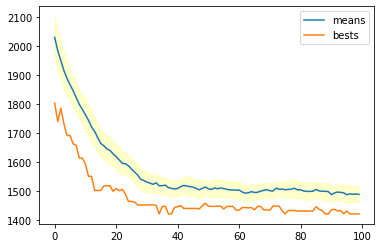

In [ ]:
r =  run_ga(pop_size=100, 
               init_population_function = lambda x: KS_initialize_population(x, object_volumes, KS_volume), 
               mutation_function        = lambda x,y: KS_mutate(x, y, object_volumes, KS_volume), 
               crossover_function       = KS_cross_over,
               cost_function            = lambda x: KS_cost(x, object_values, object_volumes, KS_volume), 
               crossover_prob           = 0.5,
               mutation_prob            = 0.5, 
               n_iters                  = 100)

best, best_costs, means, stds = r
print( "best knapsack is", best, "cost", np.min(best_costs), "value", np.sum(best*object_values), "volume", np.sum(best*object_volumes))
plot_evolution(best_costs, means, stds)


best knapsack is [0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0
 0 1 0 1 0 0 0 0 1 1 0 0 0] cost 1456 value 817 volume 95


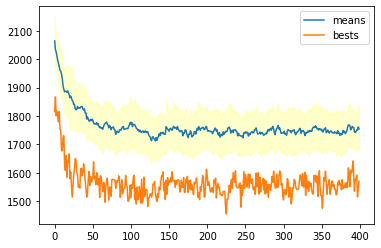

In [ ]:
r =  run_ga(pop_size=100, 
               init_population_function = lambda x: KS_initialize_population(x, object_volumes, KS_volume), 
               mutation_function        = lambda x,y: KS_mutate(x, y, object_volumes, KS_volume), 
               crossover_function       = KS_cross_over,
               cost_function            = lambda x: KS_cost(x, object_values, object_volumes, KS_volume), 
               crossover_prob           = 0.9,
               mutation_prob            = 0.9, 
               n_iters                  = 400)

best, best_costs, means, stds = r
print( "best knapsack is", best, "cost", np.min(best_costs), "value", np.sum(best*object_values), "volume", np.sum(best*object_volumes))
plot_evolution(best_costs, means, stds)


best knapsack is [0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0
 0 1 0 1 0 0 0 0 0 1 1 0 0] cost 1435 value 838 volume 98


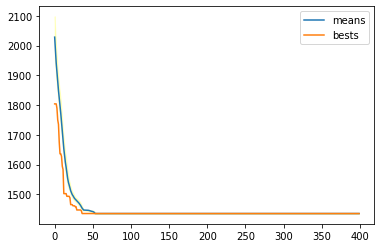

In [ ]:
r =  run_ga(pop_size=100, 
               init_population_function = lambda x: KS_initialize_population(x, object_volumes, KS_volume), 
               mutation_function        = lambda x,y: KS_mutate(x, y, object_volumes, KS_volume), 
               crossover_function       = KS_cross_over,
               cost_function            = lambda x: KS_cost(x, object_values, object_volumes, KS_volume), 
               crossover_prob           = 0.1,
               mutation_prob            = 0.1, 
               n_iters                  = 400)

best, best_costs, means, stds = r
print( "best knapsack is", best, "cost", np.min(best_costs), "value", np.sum(best*object_values), "volume", np.sum(best*object_volumes))
plot_evolution(best_costs, means, stds)


best knapsack is [0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0
 1 1 0 1 0 0 0 0 0 1 0 0 0] cost 1421 value 852 volume 99


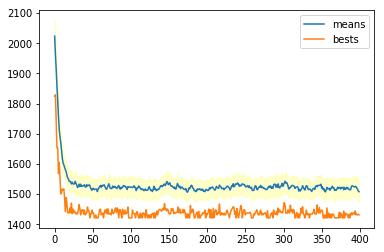

In [ ]:
r =  run_ga(pop_size=100, 
               init_population_function = lambda x: KS_initialize_population(x, object_volumes, KS_volume), 
               mutation_function        = lambda x,y: KS_mutate(x, y, object_volumes, KS_volume), 
               crossover_function       = KS_cross_over,
               cost_function            = lambda x: KS_cost(x, object_values, object_volumes, KS_volume), 
               crossover_prob           = 0.1,
               mutation_prob            = 1.0, 
               n_iters                  = 400)

best, best_costs, means, stds = r
print "best knapsack is", best, "cost", np.min(best_costs), "value", np.sum(best*object_values), "volume", np.sum(best*object_volumes)
plot_evolution(best_costs, means, stds)

#### <span style="color:#FFF; background-color:#080; font-weight:bold; padding:4px;">Importante</span> Pasos Finales. 



#### 1. Reemplace la variable con su código de estudiante

In [ ]:
#Colaboratory
import urllib.parse, inspect
taller = urllib.parse.quote_plus("Taller_06_20201_Algo_Gen")
codigo = urllib.parse.quote_plus("tl6_12345")

#Virtualbox
#import urllib, inspect
#taller = urllib.quote_plus("Taller_06_20201_Algo_Gen")
#codigo = urllib.quote_plus("tl6_12345")

print(taller, codigo)

Taller_06_20192_Algo_Gen tl6_12345


#### 2. Guarde los cambios del taller:

In [ ]:
%%javascript
require(["base/js/namespace"],function(Jupyter) {
    Jupyter.notebook.save_checkpoint();
});

<IPython.core.display.Javascript object>

#### 3. Ejecute la siguiente celda y envíe el archivo comprimido

In [ ]:
!./convert_ipynb.sh $codigo $taller

uno: tl6_12345 dos Taller_06_20192_Algo_Gen
¡PERFECTO!, el archivo   'tl6_12345.ipynb'   se creó correctamente :D


---
<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/bannerThanks.jpg" alt="Drawing" style="width:700px;"/>